# MS/MS Analysis of Dapsone

In [31]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
import venn
import matplotlib.pyplot as plt

In [2]:
default_colors = [
    # r, g, b, a
    [92, 192, 98, 0.5],
    [90, 155, 212, 0.5],
    [246, 236, 86, 0.6],
    [241, 90, 96, 0.4],
    [255, 117, 0, 0.3],
    [82, 82, 190, 0.2],
]
default_colors = [
    [i[0] / 255.0, i[1] / 255.0, i[2] / 255.0, i[3]]
    for i in default_colors
]

### Initialize variables

In [3]:
parentDTXSID = 'DTXSID4020371'
parentSMILES = 'Nc1ccc(cc1)S(=O)(=O)c1ccc(N)cc1'
parentINCHIKEY = Chem.MolToInchiKey(Chem.MolFromSmiles(parentSMILES))
root_dir = r'L:\Lab\NCCT_ExpoCast\ExpoCast2020\SSA-Metabolism\CaseStudy\Dapsone_CaseStudy'
MSMS_results = pd.read_csv(root_dir + r'\CFMID_Merged\MergedCFMIDResults.csv')

### Generate Identification DataFrame

In [4]:
identificationDF = pd.DataFrame(columns = ['Feature_Mass', 'Identifier', 'Identifier_Level', 'InChIKey' ,'Confidence', 'Formula_Score', 'MSMS_Score'])

### Predicted/Reported Metabolites list

In [5]:
aggregatedMetabolites = pd.read_csv(r'L:\Lab\NCCT_ExpoCast\ExpoCast2020\SSA-Metabolism\CaseStudy\metabolite_masterList.csv')

In [6]:
aggregatedMetabolites = aggregatedMetabolites[aggregatedMetabolites['Parent_DTXSID'] == parentDTXSID]
aggregatedMetabolites['INCHIKEY'] = [Chem.MolToInchiKey(Chem.MolFromSmiles(x)) for x in aggregatedMetabolites['SMILES']]
aggregatedMetabolites

,Parent_DTXSID,Metabolite_DTXSID,SMILES,Formula,MW,Markush,DDA_Included,BioTransformer,Meteor,ToolBox,TIMES,Reported,INCHIKEY
405,DTXSID4020371,DTXSID30186361,Nc1ccc(S(=O)(=O)c2ccc(NO)cc2)cc1,C12H12N2O3S,264.056863,False,True,1,1,1,1,1,IYDSJDWESCGRKW-UHFFFAOYSA-N
406,DTXSID4020371,DTXSID70205040,CC(=O)Nc1ccc(S(=O)(=O)c2ccc(N)cc2)cc1,C14H14N2O3S,290.072513,False,True,1,1,0,1,1,WDOCBIHNYYQINH-UHFFFAOYSA-N
407,DTXSID4020371,NaN,Nc1ccc(S(=O)(=O)c2ccc(N=O)cc2)cc1,C12H10N2O3S,262.041213,False,True,0,1,0,0,0,UAQFAHXMXOCEAD-UHFFFAOYSA-N
408,DTXSID4020371,NaN,Nc1ccc(S(=O)(=O)c2ccc([N+](=O)[O-])cc2)cc1,C12H10N2O4S,278.036128,False,True,0,1,0,0,0,DMZVYFFBWHBWMO-UHFFFAOYSA-N
409,DTXSID4020371,NaN,CC(=O)Nc1ccc(S(=O)(=O)c2ccc(N=O)cc2)cc1,C14H12N2O4S,304.051778,False,True,0,1,0,0,0,KNVQCHWAGSIUDC-UHFFFAOYSA-N
410,DTXSID4020371,DTXSID20186299,CC(=O)Nc1ccc(S(=O)(=O)c2ccc(NO)cc2)cc1,C14H14N2O4S,306.067428,False,True,0,1,0,1,1,YUWDJHZQRAHBBW-UHFFFAOYSA-N
411,DTXSID4020371,NaN,NC1=CC=C(S(=O)(=O)C2=CC(O)=C(N)C=C2)C=C1,C12H12N2O3S,264.056863,False,True,1,0,0,0,0,JIXHKLVDRQDFPA-UHFFFAOYSA-N
412,DTXSID4020371,NaN,NC1=CC=C(S(=O)(=O)C2=CC=C(N)C3OC23)C=C1,C12H12N2O3S,264.056863,False,True,1,0,0,0,0,DVWSBNJVGJFPTQ-UHFFFAOYSA-N
413,DTXSID4020371,NaN,NC1=CC=C(S(=O)(=O)C2=C(O)C=C(N)C(O)=C2)C=C1,C12H12N2O4S,280.051778,False,False,1,0,0,0,0,YRXSHCIDYZIVET-UHFFFAOYSA-N
414,DTXSID4020371,NaN,NC1=C(O)C=C(S(=O)(=O)C2=CC(O)=C(N)C=C2)C=C1,C12H12N2O4S,280.051778,False,False,1,0,0,0,0,KHAFBBNQUOEYHB-UHFFFAOYSA-N


### CFMID Identifications

In [7]:
MSMS_results

,MASS,DTXCID,FORMULA,SMILES,Feature_MASS,energy_sum_MEDIAN,quotient_SCORE
0,248.06374,DTXCID20501069,C17H9FO,FC1=CC=C(C=C1)C#CC(=O)C#CC1=CC=CC=C1,248.0633,0.030667,0.248784
1,248.06445,DTXCID40953268,C8H12N2O7,NC(CC(=O)NC(CC(O)=O)C(O)=O)C(O)=O,248.0633,0.005486,0.044502
2,248.06489,DTXCID20159100,C14H10F2O2,COC1=C(F)C=C(C=C1)C(=O)C1=CC=C(F)C=C1,248.0633,0.000114,0.000927
3,248.06374,DTXCID5082992,C17H9FO,FC(=O)C1=C2C=CC3=CC=CC4=C3C2=C(C=C4)C=C1,248.0633,0.025557,0.207329
4,248.06360,DTXCID20509904,C10H17O3PS,S=P12OCC(CO1)(CO2)C1CCCCC1,248.0633,0.026537,0.215277
...,...,...,...,...,...,...,...
424,461.35051,DTXCID701444367,C28H47NO4,CCCCCCCCCCCCCCCCC\C(O)=N\C(CC1=CC=C(O)C=C1)C(=...,461.3528,0.022573,1.000000
425,461.35051,DTXCID10950087,C28H47NO4,CCOC(=O)CNC(=O)CCC(C)C1CCC2C3CCC4CC(O)CCC4(C)C...,461.3528,0.018309,0.811088
426,461.35051,DTXCID7043790,C28H47NO4,CCCCCCCCCCCCCCCCCCNC1=CC(=CC(=C1)C(=O)OC)C(=O)OC,461.3528,0.020431,0.905081
427,610.56486,DTXCID80817855,C37H74N2O4,CCCCCCCCCCCCCCCCNC(=O)CC(=O)N(CCCCCCCCCCCCCCCC...,610.5654,0.055599,1.000000


In [8]:
print('Num features in MSMS data: ' + str(len(MSMS_results['Feature_MASS'].unique())))

Num features in MSMS data: 9


## Match MSMS predictions against known/predicted metabolites

In [9]:
MSMS_results['InchiKey'] = [Chem.MolToInchiKey(Chem.MolFromSmiles(x)) for x in MSMS_results['SMILES']]
MSMS_results.drop_duplicates(subset = 'InchiKey', inplace = True)
MSMS_results['Predicted'] = [True if x in aggregatedMetabolites['INCHIKEY'].values else False for x in MSMS_results['InchiKey']]

In [10]:
predictedSubset = MSMS_results[MSMS_results['Predicted'] == True]
predictedSubset

,MASS,DTXCID,FORMULA,SMILES,Feature_MASS,energy_sum_MEDIAN,quotient_SCORE,InchiKey,Predicted
268,248.06195,DTXCID00371,C12H12N2O2S,NC1=CC=C(C=C1)S(=O)(=O)C1=CC=C(N)C=C1,248.0633,0.062404,0.506246,MQJKPEGWNLWLTK-UHFFFAOYSA-N,True


In [11]:
for idx, compound in predictedSubset.iterrows():
    rowDF = pd.DataFrame(data = {'Feature_Mass' : compound['Feature_MASS'],
                                 'Identifier': compound['SMILES'],
                                 'Identifier_Level' : 'Structure - MS2',
                                 'InChIKey' : Chem.MolToInchiKey(Chem.MolFromSmiles(compound['SMILES'])),
                                 'Confidence' : '2b',
                                 'Formula_Score' : None,
                                 'MSMS_Score' : compound['quotient_SCORE']}, index=[idx])
    identificationDF = identificationDF.append(rowDF)

In [12]:
identificationDF

,Feature_Mass,Identifier,Identifier_Level,InChIKey,Confidence,Formula_Score,MSMS_Score
268,248.0633,NC1=CC=C(C=C1)S(=O)(=O)C1=CC=C(N)C=C1,Structure - MS2,MQJKPEGWNLWLTK-UHFFFAOYSA-N,2b,None,0.506246


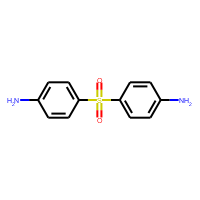

In [13]:
mols = []
for featureMass in predictedSubset['Feature_MASS'].unique():
    rows = predictedSubset[predictedSubset['Feature_MASS'] == featureMass]
    mols = mols + [Chem.MolFromSmiles(x) for x in rows['SMILES']]
img = Draw.MolsToGridImage(mols, molsPerRow=len(mols), subImgSize=(200,200))
display(img)

In [14]:
for chem in predictedSubset['SMILES']:
    Draw.MolToFile(Chem.MolFromSmiles(chem), root_dir + '\Figures\MOLImage' +chem+ '.png')

## Find structures missed by CFMID but matched between predictions/reported and MS labeling

In [15]:
featureList = pd.read_csv(root_dir + '\Filtered_features\FeatureList_subset.csv')
#Clean naming of formula
featureList['Formula'] = featureList['Formula'].apply(lambda x: x.rsplit('Esi')[0] if 'Esi' in x else x.rsplit('_mfg')[0] if '_mfg' in x else x)
#Remove features that have a formula already identified in predictedSubset
featureList = featureList[~featureList['Formula'].isin(predictedSubset['FORMULA'])]

In [16]:
featureList

,index,Feature_ID,Formula,Score,Mass,Retention_Time,BlankG00,BlankG01,BlankG02,Gluc00,...,Super42,BlankSub_Median_Super4,BlankSub_Max_Median_ALLSamples_Super4,Has_Adduct_or_Loss,Is_Adduct_or_Loss,Adduct_or_Loss_Info,Annotation_Source,Formula_Clean,KMeans,orderCat
1,32,464,C12H8N2O6S,68.06,354.0146,0.488000,NaN,NaN,NaN,316026.0,...,NaN,NaN,NaN,0,0,NaN,Suspect,C12H8N2O6S,11,1
2,606,1537,C16H33NO2,98.47,271.2502,7.791995,NaN,NaN,NaN,NaN,...,2592646.0,5120955.0,5120955.0,0,0,NaN,MFG,C16H33NO2,11,3
3,608,1626,C17H41N7,78.23,343.3393,10.261998,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,NaN,MFG,C17H41N71,11,3
4,610,1587,C19H33OS,73.20,309.2273,8.480003,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,NaN,MFG,C19H33OS,11,3
5,611,1730,C19H37N11O2,81.17,451.3123,8.041994,NaN,NaN,NaN,NaN,...,593874.0,562094.0,562094.0,0,0,NaN,MFG,C19H37N11O2,11,3
6,612,1598,C19H40ClN,83.37,317.2830,8.782996,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,NaN,MFG,C19H40ClN,11,3
7,620,1679,C29H12N2,69.17,388.1014,8.420005,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,NaN,MFG,C29H12N2,11,3
8,626,1738,C31H45N2O,73.92,461.3528,10.744997,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,NaN,MFG,C31H45N2O,11,3
9,174,847,C38H70N6,98.29,610.5654,12.122992,NaN,NaN,NaN,181118.0,...,355124.0,234105.0,234105.0,0,0,NaN,MFG,C38H70N61,11,3
10,650,1985,C42H59N6O2,98.67,679.4732,11.239996,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,NaN,MFG,C42H59N6O2,11,3


In [17]:
allSus = pd.read_csv('L:\\Lab\\NCCT_ExpoCast\\ExpoCast2020\\SSA-Metabolism\\CaseStudy\\metabolite_masterList.csv')
allSus = allSus.fillna('None')
allSus = allSus[allSus['Parent_DTXSID'] == parentDTXSID]
allSus['Metabolite_INCHIKEY'] = [Chem.MolToInchiKey(Chem.MolFromSmiles(x)) for x in allSus['SMILES']]

In [18]:
allSus

,Parent_DTXSID,Metabolite_DTXSID,SMILES,Formula,MW,Markush,DDA_Included,BioTransformer,Meteor,ToolBox,TIMES,Reported,Metabolite_INCHIKEY
405,DTXSID4020371,DTXSID30186361,Nc1ccc(S(=O)(=O)c2ccc(NO)cc2)cc1,C12H12N2O3S,264.056863,False,True,1,1,1,1,1,IYDSJDWESCGRKW-UHFFFAOYSA-N
406,DTXSID4020371,DTXSID70205040,CC(=O)Nc1ccc(S(=O)(=O)c2ccc(N)cc2)cc1,C14H14N2O3S,290.072513,False,True,1,1,0,1,1,WDOCBIHNYYQINH-UHFFFAOYSA-N
407,DTXSID4020371,None,Nc1ccc(S(=O)(=O)c2ccc(N=O)cc2)cc1,C12H10N2O3S,262.041213,False,True,0,1,0,0,0,UAQFAHXMXOCEAD-UHFFFAOYSA-N
408,DTXSID4020371,None,Nc1ccc(S(=O)(=O)c2ccc([N+](=O)[O-])cc2)cc1,C12H10N2O4S,278.036128,False,True,0,1,0,0,0,DMZVYFFBWHBWMO-UHFFFAOYSA-N
409,DTXSID4020371,None,CC(=O)Nc1ccc(S(=O)(=O)c2ccc(N=O)cc2)cc1,C14H12N2O4S,304.051778,False,True,0,1,0,0,0,KNVQCHWAGSIUDC-UHFFFAOYSA-N
410,DTXSID4020371,DTXSID20186299,CC(=O)Nc1ccc(S(=O)(=O)c2ccc(NO)cc2)cc1,C14H14N2O4S,306.067428,False,True,0,1,0,1,1,YUWDJHZQRAHBBW-UHFFFAOYSA-N
411,DTXSID4020371,None,NC1=CC=C(S(=O)(=O)C2=CC(O)=C(N)C=C2)C=C1,C12H12N2O3S,264.056863,False,True,1,0,0,0,0,JIXHKLVDRQDFPA-UHFFFAOYSA-N
412,DTXSID4020371,None,NC1=CC=C(S(=O)(=O)C2=CC=C(N)C3OC23)C=C1,C12H12N2O3S,264.056863,False,True,1,0,0,0,0,DVWSBNJVGJFPTQ-UHFFFAOYSA-N
413,DTXSID4020371,None,NC1=CC=C(S(=O)(=O)C2=C(O)C=C(N)C(O)=C2)C=C1,C12H12N2O4S,280.051778,False,False,1,0,0,0,0,YRXSHCIDYZIVET-UHFFFAOYSA-N
414,DTXSID4020371,None,NC1=C(O)C=C(S(=O)(=O)C2=CC(O)=C(N)C=C2)C=C1,C12H12N2O4S,280.051778,False,False,1,0,0,0,0,KHAFBBNQUOEYHB-UHFFFAOYSA-N


In [19]:
for idx, compound in featureList.iterrows():
    formulaFilter = allSus['Formula'].str.contains(compound['Formula'])
    if sum(formulaFilter) == 1:
        tmpDF = pd.DataFrame(data = {'Feature_Mass': compound['Mass'],
                                 'Identifier': allSus.loc[formulaFilter, 'SMILES'].values[0],
                                 'Identifier_Level' : 'Structure - MS1',
                                 'InChIKey' : allSus.loc[formulaFilter, 'Metabolite_INCHIKEY'].values[0],
                                 'Confidence' : '3',
                                 'Formula_Score' : compound['Score'],
                                 'MSMS_Score' : None}, index=[idx])
        identificationDF = identificationDF.append(tmpDF)
    elif sum(formulaFilter) == 0:
        tmpDF = pd.DataFrame(data = {'Feature_Mass': compound['Mass'],
                                 'Identifier': compound['Formula'],
                                 'Identifier_Level' : 'Formula',
                                 'InChIKey' :  None,
                                 'Confidence' : '4',
                                 'Formula_Score' : compound['Score'],
                                 'MSMS_Score' : None}, index=[idx])
        
        identificationDF = identificationDF.append(tmpDF)

In [20]:
identificationDF.sort_values(by = 'Confidence')

,Feature_Mass,Identifier,Identifier_Level,InChIKey,Confidence,Formula_Score,MSMS_Score
268,248.0633,NC1=CC=C(C=C1)S(=O)(=O)C1=CC=C(N)C=C1,Structure - MS2,MQJKPEGWNLWLTK-UHFFFAOYSA-N,2b,NaN,0.506246
1,354.0146,C12H8N2O6S,Formula,None,4,68.06,None
2,271.2502,C16H33NO2,Formula,None,4,98.47,None
3,343.3393,C17H41N7,Formula,None,4,78.23,None
4,309.2273,C19H33OS,Formula,None,4,73.20,None
5,451.3123,C19H37N11O2,Formula,None,4,81.17,None
6,317.2830,C19H40ClN,Formula,None,4,83.37,None
7,388.1014,C29H12N2,Formula,None,4,69.17,None
8,461.3528,C31H45N2O,Formula,None,4,73.92,None
9,610.5654,C38H70N6,Formula,None,4,98.29,None


In [21]:
matchedDF = allSus[(allSus['Metabolite_INCHIKEY'].isin(identificationDF['InChIKey'])) | (allSus['Reported'] == 1)]
matchedDF

,Parent_DTXSID,Metabolite_DTXSID,SMILES,Formula,MW,Markush,DDA_Included,BioTransformer,Meteor,ToolBox,TIMES,Reported,Metabolite_INCHIKEY
405,DTXSID4020371,DTXSID30186361,Nc1ccc(S(=O)(=O)c2ccc(NO)cc2)cc1,C12H12N2O3S,264.056863,False,True,1,1,1,1,1,IYDSJDWESCGRKW-UHFFFAOYSA-N
406,DTXSID4020371,DTXSID70205040,CC(=O)Nc1ccc(S(=O)(=O)c2ccc(N)cc2)cc1,C14H14N2O3S,290.072513,False,True,1,1,0,1,1,WDOCBIHNYYQINH-UHFFFAOYSA-N
410,DTXSID4020371,DTXSID20186299,CC(=O)Nc1ccc(S(=O)(=O)c2ccc(NO)cc2)cc1,C14H14N2O4S,306.067428,False,True,0,1,0,1,1,YUWDJHZQRAHBBW-UHFFFAOYSA-N
428,DTXSID4020371,DTXSID301025989,Nc1ccc(S(=O)(=O)c2ccc(NS(=O)(=O)O)cc2)cc1,C12H12N2O5S2,328.018763,False,True,0,0,0,0,1,KNFUZUFESLSLKB-UHFFFAOYSA-N
429,DTXSID4020371,DTXSID4020371,NC1=CC=C(C=C1)S(=O)(=O)C1=CC=C(N)C=C1,C12H12N2O2S,248.061949,False,False,0,0,0,0,1,MQJKPEGWNLWLTK-UHFFFAOYSA-N
430,DTXSID4020371,DTXSID901025987,NC1=CC=C(C=C1)S(=O)(=O)C1=CC=C(C=C1)N=[N+]([O-...,C24H20N4O5S2,508.087512,False,False,0,0,0,0,1,SMEWQWPADHSEIL-UHFFFAOYSA-N
431,DTXSID4020371,DTXSID601025988,CC(=O)NC1=CC=C(C=C1)S(=O)(=O)C1=CC=C(C=C1)N=[N...,C28H24N4O7S2,592.108641,False,False,0,0,0,0,1,UOFIDWMWIKWWKD-UHFFFAOYSA-N
432,DTXSID4020371,DTXSID601025990,NC1=CC=C(C=C1)S(=O)(=O)C1=CC=C(N[C@@H]2O[C@@H]...,C18H20N2O8S,424.094037,False,False,0,0,0,0,1,ZKHAMZKMPOMZRB-ZOFXXKQRSA-N


In [22]:
modelList = ['ToolBox', 'Meteor', 'BioTransformer', 'TIMES', 'Reported']

aggGroup = allSus[allSus['Parent_DTXSID'].isin(['DTXSID4034150'])]
performanceMap = pd.DataFrame(data = None, columns=['Model','Total','Unique','NTA_Match_Count'])
performanceMap['Model'] = modelList
performanceMap['Total'] = list(allSus[modelList].sum(axis=0))
performanceMap['Unique'] = [sum((allSus[match] == 1.0) & (allSus[modelList].sum(axis = 1) == 1)) for match in modelList]
performanceMap['NTA_Match_Count'] = [sum(allSus.loc[allSus[match] == 1,'Metabolite_INCHIKEY'].isin(identificationDF['InChIKey'])) for match in modelList]


In [23]:
performanceMap

,Model,Total,Unique,NTA_Match_Count
0,ToolBox,1,0,0
1,Meteor,6,3,0
2,BioTransformer,16,14,0
3,TIMES,5,2,0
4,Reported,8,5,1


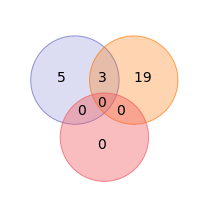

In [33]:
bt_venn = set([row['Metabolite_INCHIKEY'] for idx, row in allSus.iterrows() if row['BioTransformer'] > 0])
meteor_venn = set([row['Metabolite_INCHIKEY'] for idx, row in allSus.iterrows() if row['Meteor'] > 0])
times_venn = set([row['Metabolite_INCHIKEY'] for idx, row in allSus.iterrows() if row['TIMES'] > 0])
tb_venn = set([row['Metabolite_INCHIKEY'] for idx, row in allSus.iterrows() if row['ToolBox'] > 0])

silico_venn = set([row['Metabolite_INCHIKEY'] for idx, row in allSus.iterrows() if (row['ToolBox'] > 0 or row['BioTransformer'] > 0 or row['Meteor'] > 0 or row['TIMES'] > 0)])
lit_venn = set([row['Metabolite_INCHIKEY'] for idx, row in allSus.iterrows() if row['Reported'] > 0])
vitro_venn = set([row['InChIKey'] if row['Identifier_Level'] != 'Formula' else row['Identifier'] for idx, row in identificationDF.iterrows() if row['InChIKey'] != parentINCHIKEY]) 

labels = venn.get_labels([lit_venn, silico_venn, vitro_venn])
labels['001'] = '0 '
fig, ax = venn.venn4(labels, names=['Reported', 'Predicted', 'Measured'], colors = [default_colors[-1], default_colors[-2],default_colors[-3]],figsize = (3,3))
ax.get_legend().remove()
comp = 'Dapsone'
plt.tight_layout()
fig.savefig(r'C:\Users\MBOYCE\OneDrive - Environmental Protection Agency (EPA)\Profile\Documents\\'+comp+r'_GenOverlap.tiff', dpi = 300)

In [25]:
#Find overlapping metabolites 
bt_union = bt_venn.intersection(vitro_venn)
meteor_union = meteor_venn.intersection(vitro_venn)
times_union = times_venn.intersection(vitro_venn)
tb_union = tb_venn.intersection(vitro_venn)
lit_union = lit_venn.intersection(vitro_venn)

labels = venn.get_labels([bt_union, meteor_union, times_union, tb_union, lit_union],fill=['number'])
for k in labels:
    if labels[k] == '0 ':
        labels.update({k : ''})
fig, ax = venn.venn5(labels, names=['BioTransformer', 'Meteor', 'TIMES', 'Toolbox', 'Reported'])

ZeroDivisionError: division by zero